In [1]:
import os
from scipy.stats import multivariate_normal
import numpy as np
import matplotlib.pyplot as plt
import torch, torchvision
import sys
sys.path.insert(0, '..')
import src.util as uti
import src.util.runtime_util as rtut
import src.input_generator as inge
import matplotlib.animation as animation

In [2]:
configs_random = [(f'corr {corr:.01f}',corr) for corr in np.arange(0.,1.05,0.05)]

In [3]:
def generate_random_variables(N=int(1e5), corr=0., means=[0.0, 0.0], stds=[1.0, 1.0], train_test_split=None):

    cov = [[stds[0]**2, stds[0]*stds[1]*corr], [stds[0]*stds[1]*corr, stds[1]**2]]
    normal = multivariate_normal(means, cov, allow_singular=True) 
    A, B = normal.rvs(size=N).astype(np.float32).T
    A = torch.from_numpy(A).unsqueeze(-1).to(rtut.device)
    B = torch.from_numpy(B).unsqueeze(-1).to(rtut.device)

    return A[:train_test_split], B[:train_test_split], A[train_test_split:], B[train_test_split:]

/eos/home-k/kiwoznia/software/.pyenv/versions/3.10.13/lib/python3.10/site-packages/torch/cuda/__init__.py:628: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


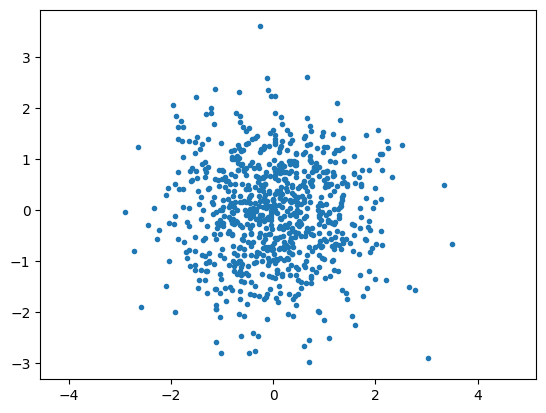

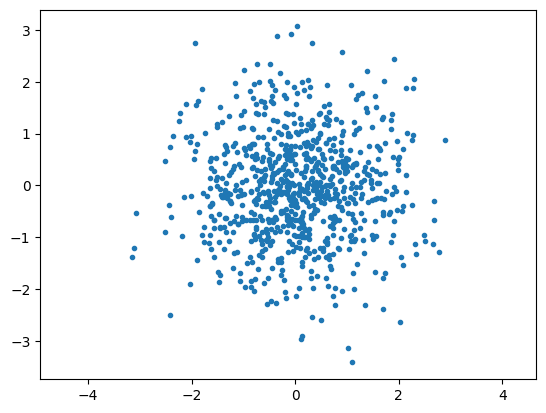

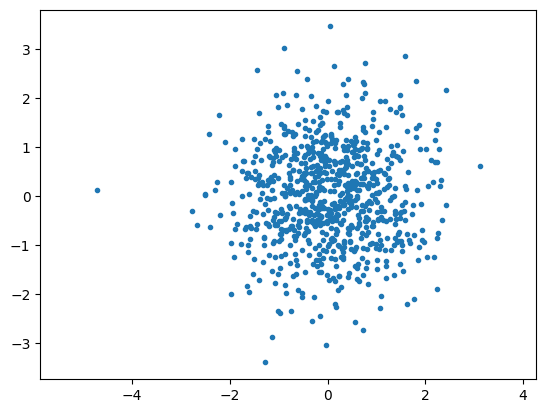

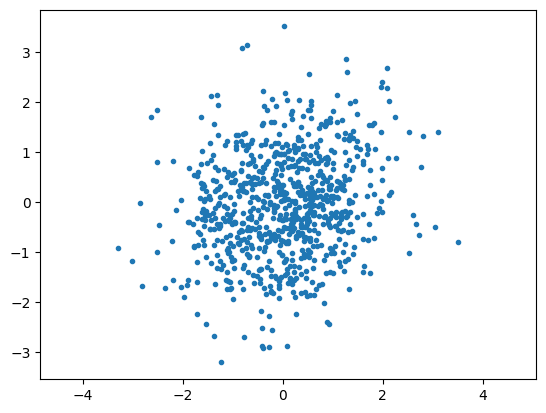

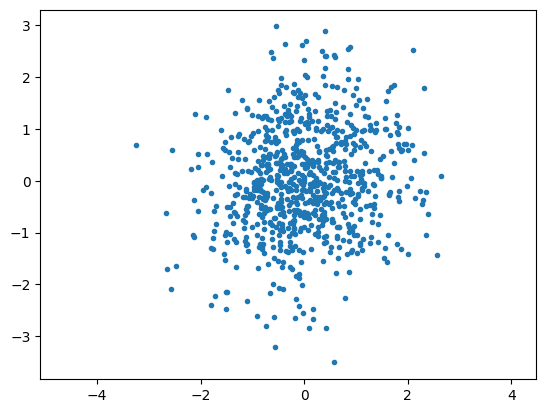

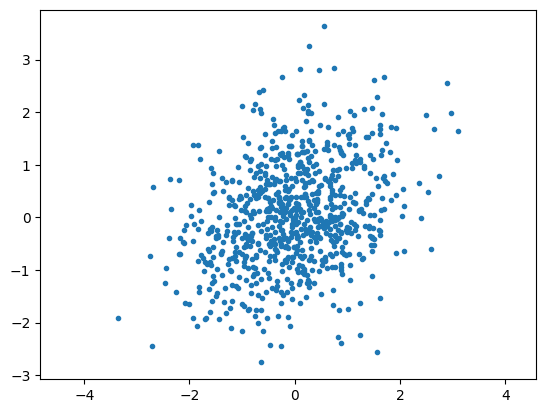

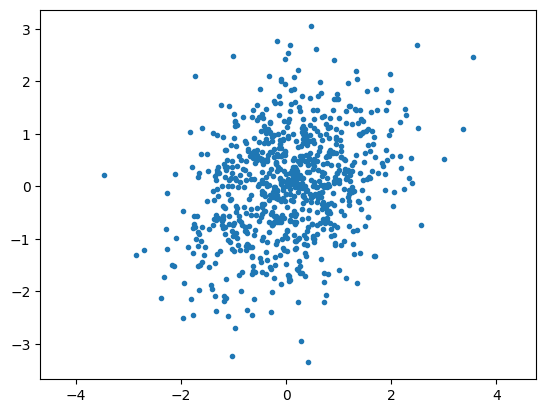

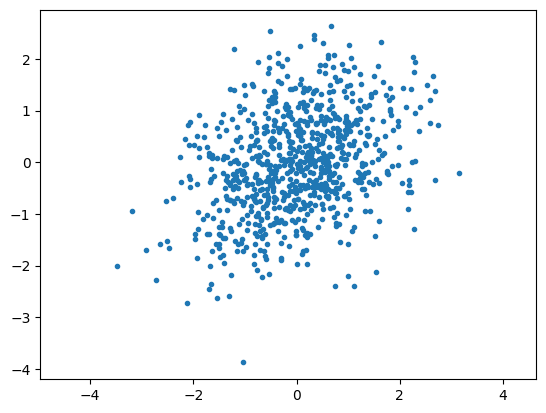

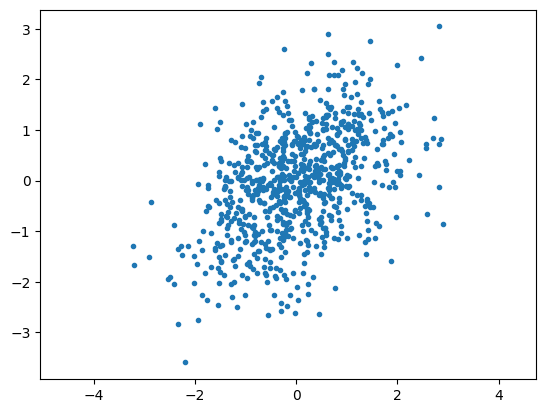

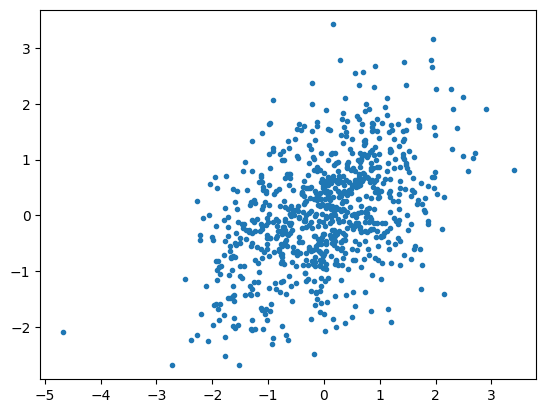

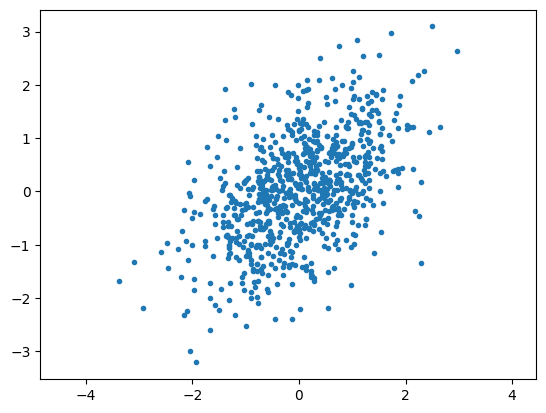

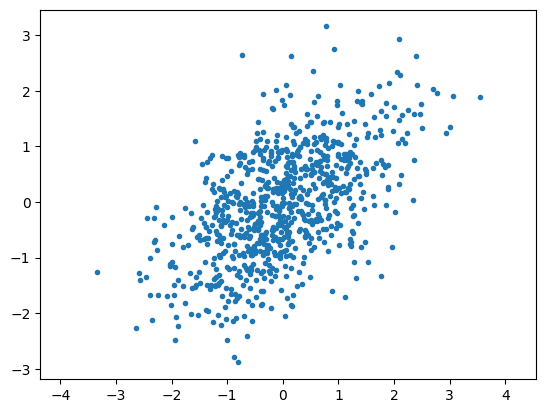

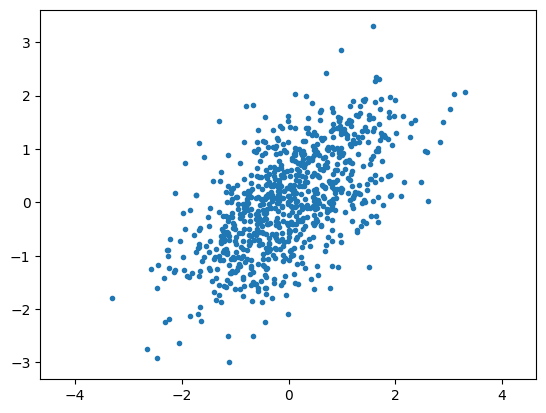

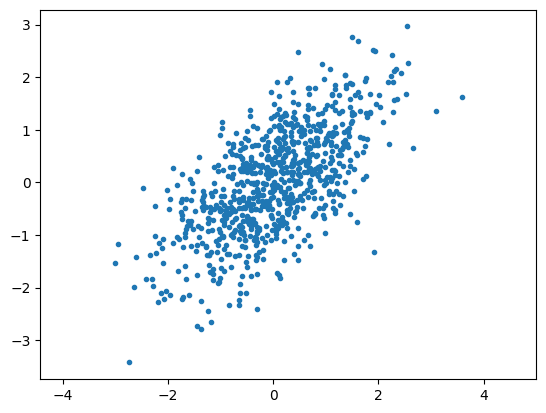

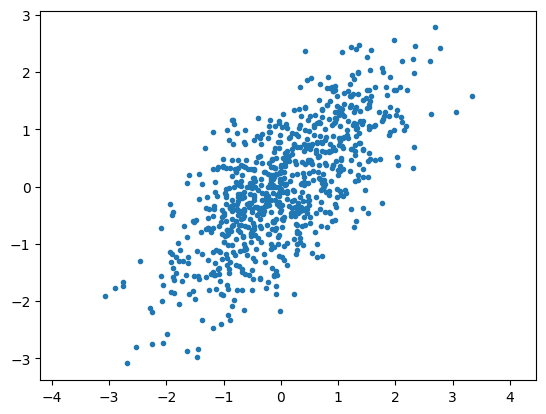

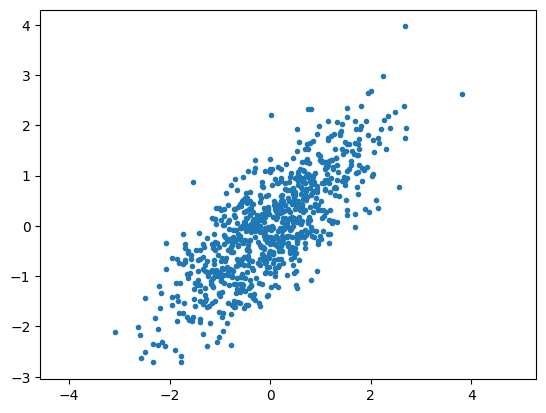

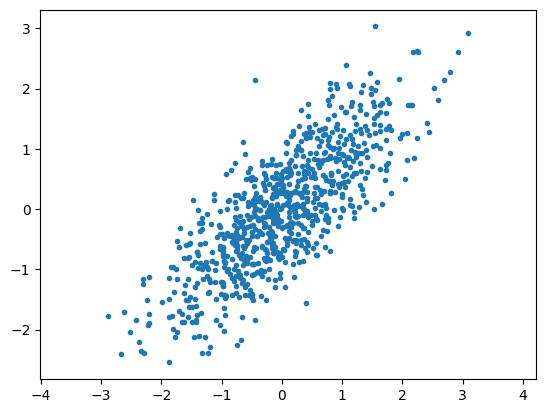

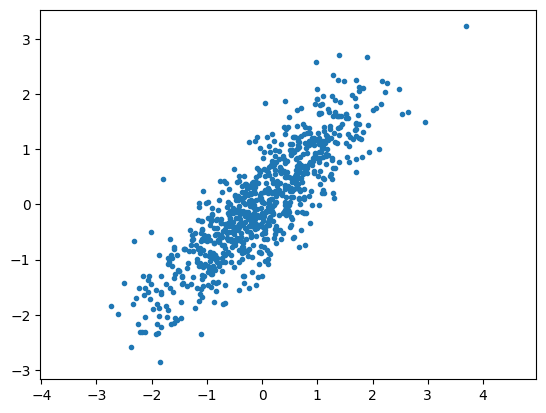

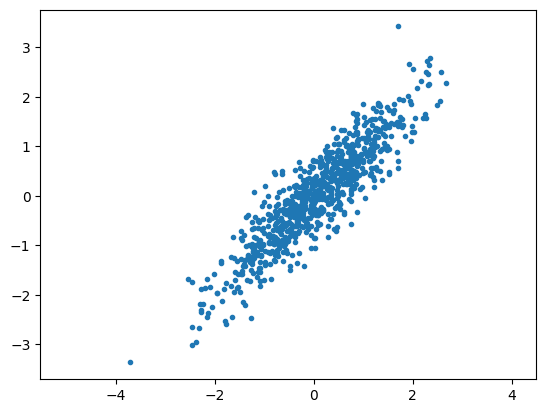

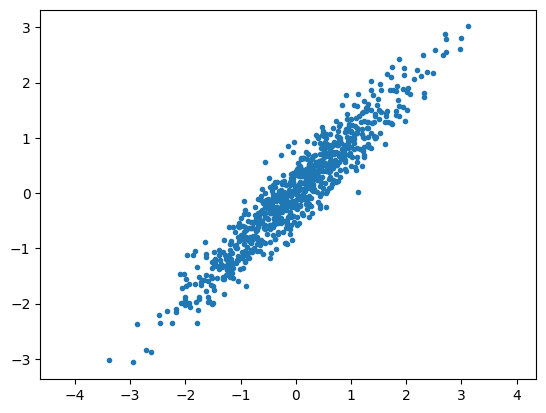

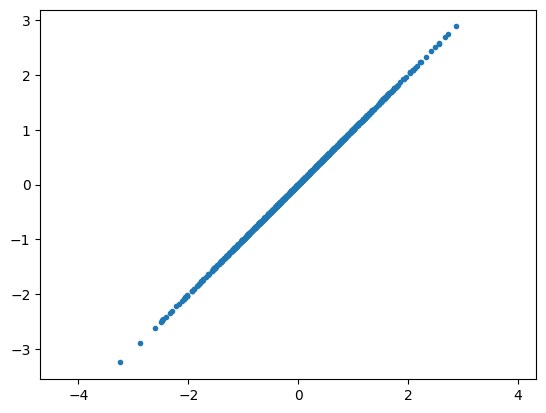

In [4]:
for config_name, corr in configs_random:
    A_train, B_train, A_test, B_test = generate_random_variables(800, corr)
    plt.figure()
    plt.plot(A_train.cpu().numpy(), B_train.cpu().numpy(), '.')
    plt.axis('equal')
    plt.show()

In [5]:
import matplotlib
%matplotlib notebook

In [71]:
import pandas as pd
file_path = '../results/results_corr_20240225.pkl'
df = pd.read_pickle(file_path)

In [70]:
df.to_pickle(file_path)

In [ ]:
df = df[:-1]

In [44]:
df.columns

Index(['name', 'corr', 'train ml mi', 'train appr mi', 'train true mi',
       'test ml mi', 'test appr mi', 'test true mi'],
      dtype='object')

In [45]:
%matplotlib inline

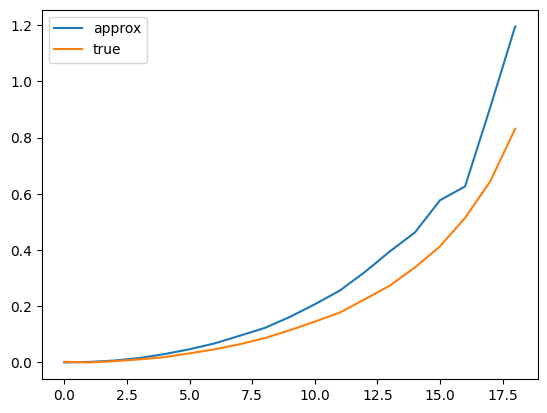

In [46]:
fig, ax = plt.subplots()
aa = ax.plot(df['train ml mi'][:-1],label='approx')[0]
bb = ax.plot(df['train true mi'][:-1],label='true')[0]
ax.legend()

In [72]:
df

,name,corr,train ml mi,train appr mi,train true mi,test ml mi,test appr mi,test true mi
0,corr 0.00,0.00,-3.602607e-07,-0.099118,0.002412,3.435249e-08,-0.446699,0.000000
1,corr 0.05,0.05,1.895366e-03,-0.275118,0.000000,1.779789e-03,-0.279440,0.000059
2,corr 0.10,0.10,6.885406e-03,-0.420137,0.004593,7.318801e-03,-0.196349,0.005264
3,corr 0.15,0.15,1.590924e-02,-0.301938,0.011093,1.573694e-02,-0.309532,0.009512
4,corr 0.20,0.20,2.977461e-02,-0.223061,0.018966,2.896933e-02,-0.429672,0.018838
5,corr 0.25,0.25,4.698813e-02,-0.195692,0.032535,4.614119e-02,-0.181378,0.033779
6,corr 0.30,0.30,6.781781e-02,-0.321601,0.046770,6.692005e-02,-0.300612,0.047619
7,corr 0.35,0.35,9.501270e-02,-0.275484,0.064762,9.126270e-02,-0.391137,0.062616
8,corr 0.40,0.40,1.227582e-01,-0.214902,0.086473,1.231583e-01,-0.231198,0.087173
9,corr 0.45,0.45,1.617445e-01,-0.281448,0.114678,1.634086e-01,-0.363426,0.112101


In [48]:
bb

In [49]:
aa.set_ydata(df['train ml mi'][:3])

In [50]:
df.index[:3]

RangeIndex(start=0, stop=3, step=1)

In [51]:
t = np.linspace(0, len(df), 1)

In [52]:
df['corr'].iloc[-1]

0.9500000000000001

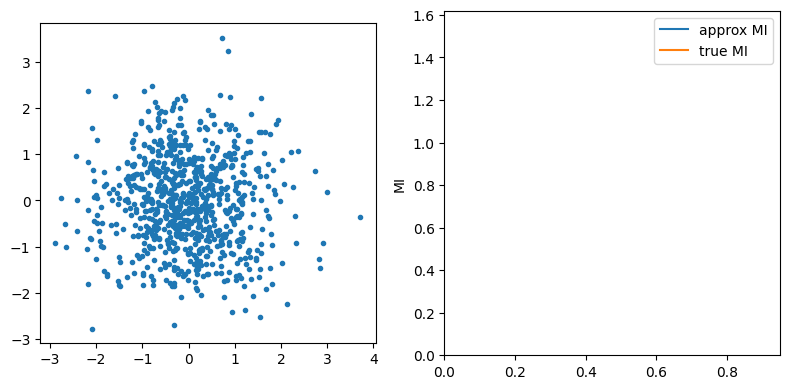

In [54]:
fig, ax = plt.subplots(1,2,figsize=(8,4))
A_train, B_train, A_test, B_test = inge.generate_random_variables(800, 0)
A_train, B_train, A_test, B_test = A_train.cpu().numpy(), B_train.cpu().numpy(), A_test.cpu().numpy(), B_test.cpu().numpy()
ll1 = ax[0].plot(A_train, B_train, '.')[0]
ll2 = ax[1].plot(df['train ml mi'][0],label='approx MI')[0]
ll3 = ax[1].plot(df['train true mi'][0],label='true MI')[0]
ax[0].set_aspect('equal')
ax[1].set(xlim=[0, df['corr'].iloc[-1]], ylim=[0,df['train ml mi'].max()], ylabel='MI')
ax[1].legend()
plt.tight_layout()

def update(frame):
    corr = df['corr'][frame]
    A_train, B_train, A_test, B_test = inge.generate_random_variables(800, corr)
    A_train, B_train, A_test, B_test = A_train.cpu().numpy(), B_train.cpu().numpy(), A_test.cpu().numpy(), B_test.cpu().numpy()
    ll1.set_xdata(A_train)
    ll1.set_ydata(B_train)
    ll2.set_xdata(df['corr'][:frame])
    ll2.set_ydata(df['train ml mi'][:frame])
    ll3.set_xdata(df['corr'][:frame])
    ll3.set_ydata(df['train true mi'][:frame])
    return ll1, ll2, ll3


ani = animation.FuncAnimation(fig=fig, func=update, frames=len(df), interval=400, repeat=False)
plt.show()

/eos/home-k/kiwoznia/software/.pyenv/versions/3.10.13/lib/python3.10/site-packages/matplotlib/animation.py:892: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


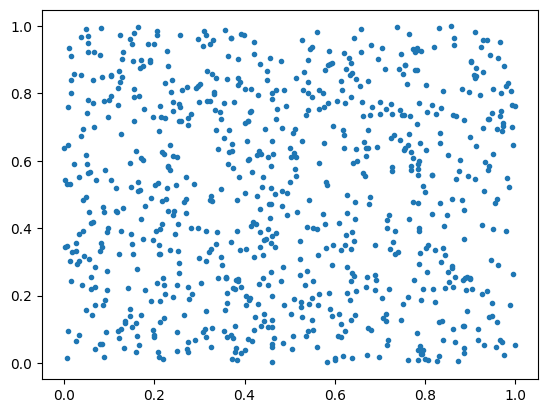

In [55]:
fig2, ax2 = plt.subplots()
t = np.linspace(0, 3, 40)
g = -9.81
v0 = 12
z = g * t**2 / 2 + v0 * t

v02 = 5
z2 = g * t**2 / 2 + v02 * t
line2 = ax2.plot(np.random.rand(800),np.random.rand(800), '.')[0]


def update2(frame):
    label, corr = configs_random[frame]
    A_train, B_train, A_test, B_test = inge.generate_random_variables(800, corr)
    line2.set_xdata(A_train)
    line2.set_ydata(B_train)
    return line2


ani = animation.FuncAnimation(fig=fig2, func=update2, frames=40, interval=30)
plt.show()

In [58]:
!pip install ipympl

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.6/511.6 kB 3.6 MB/s eta 0:00:00:00:01


In [61]:
%matplotlib inline

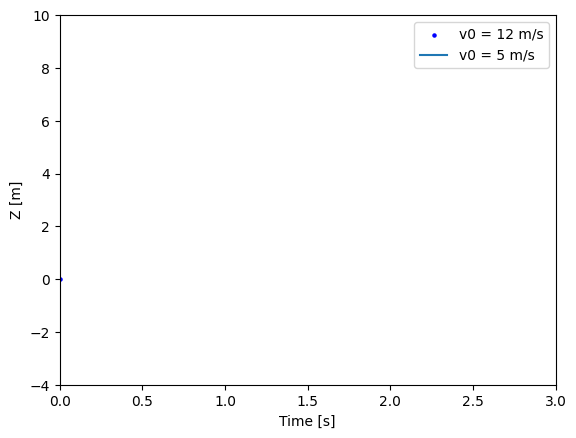

In [62]:
fig, ax = plt.subplots()
t = np.linspace(0, 3, 40)
g = -9.81
v0 = 12
z = g * t**2 / 2 + v0 * t

v02 = 5
z2 = g * t**2 / 2 + v02 * t

scat = ax.scatter(t[0], z[0], c="b", s=5, label=f'v0 = {v0} m/s')
line2 = ax.plot(t[0], z2[0], label=f'v0 = {v02} m/s')[0]
ax.set(xlim=[0, 3], ylim=[-4, 10], xlabel='Time [s]', ylabel='Z [m]')
ax.legend()


def update(frame):
    # for each frame, update the data stored on each artist.
    x = t[:frame]
    y = z[:frame]
    # update the scatter plot:
    data = np.stack([x, y]).T
    scat.set_offsets(data)
    # update the line plot:
    line2.set_xdata(t[:frame])
    line2.set_ydata(z2[:frame])
    return (scat, line2)


ani = animation.FuncAnimation(fig=fig, func=update, frames=40, interval=30)
plt.show(block=True)

In [63]:
np.arange(0.,1.1,0.05)

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  , 1.05])

<IPython.core.display.Javascript object>


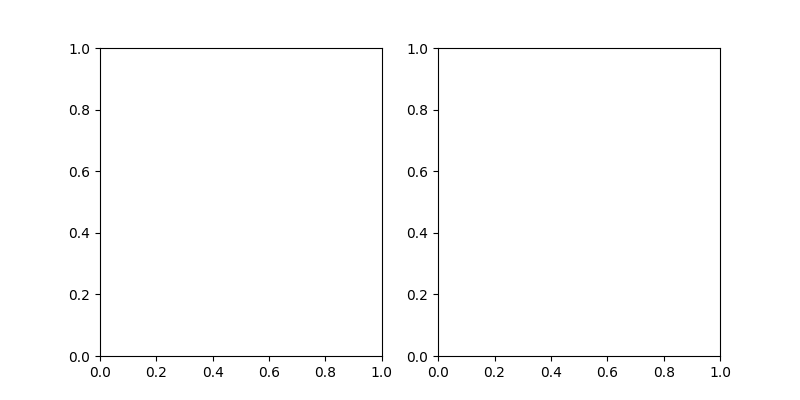

In [26]:
fig = plt.subplots(1,2,figsize=(8,4))

In [29]:
type(fig[1])

numpy.ndarray

In [30]:
class Animator():

    def __init__(self,result_df,N):
        self.result_df = result_df
        self.fig, self.axs = plt.subplots(1,2,figsize=(8,4))
        A_train, B_train, A_test, B_test = inge.generate_random_variables(N=N, corr=0)
        A_train, B_train, A_test, B_test = A_train.cpu().numpy(), B_train.cpu().numpy(), A_test.cpu().numpy(), B_test.cpu().numpy()
        self.ll1 = self.axs[0].plot(A_train, B_train, '.')[0]
        self.ll2 = self.axs[1].plot(result_df['train ml mi'][0],label='approx MI')[0]
        self.ll3 = self.axs[1].plot(result_df['train true mi'][0],label='true MI')[0]
        self.axs[0].set_aspect('equal')
        self.axs[1].set(xlim=[0, result_df['corr'].iloc[-1]], ylim=[0,result_df['train ml mi'].max()*1.1], ylabel='MI')
        self.axs[1].legend()
        plt.tight_layout() 

    def animate(self,frame):

        corr = self.result_df['corr'][frame]
        A_train, B_train, A_test, B_test = inge.generate_random_variables(800, corr)
        A_train, B_train, A_test, B_test = A_train.cpu().numpy(), B_train.cpu().numpy(), A_test.cpu().numpy(), B_test.cpu().numpy()
        self.ll1.set_xdata(A_train)
        self.ll1.set_ydata(B_train)
        self.ll2.set_xdata(self.result_df['corr'][:frame+1])
        self.ll2.set_ydata(self.result_df['train ml mi'][:frame+1])
        self.ll3.set_xdata(self.result_df['corr'][:frame+1])
        self.ll3.set_ydata(self.result_df['train true mi'][:frame+1])
        return self.ll1, self.ll2, self.ll3


In [38]:
result_path = '../results/results_random.h5'

In [39]:
df = pd.read_pickle(result_path)
#df.at[19,'train ml mi'] = 1.6192
#df.at[19,'test ml mi'] = 1.6192
#df = df[:-1]

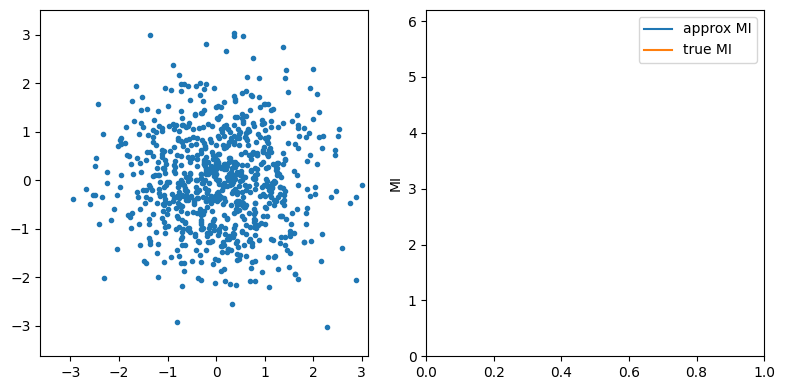

In [40]:
N = 800
animator = Animator(df,N)
animObj = animation.FuncAnimation(animator.fig, animator.animate, frames=len(df), repeat=False, interval=300, blit=True)
plt.show()

In [35]:
df

,name,corr,train ml mi,train appr mi,train true mi,test ml mi,test appr mi,test true mi
0,corr 0.00,0.00,-3.602607e-07,-0.099118,0.002412,3.435249e-08,-0.446699,0.000000
1,corr 0.05,0.05,1.895366e-03,-0.275118,0.000000,1.779789e-03,-0.279440,0.000059
2,corr 0.10,0.10,6.885406e-03,-0.420137,0.004593,7.318801e-03,-0.196349,0.005264
3,corr 0.15,0.15,1.590924e-02,-0.301938,0.011093,1.573694e-02,-0.309532,0.009512
4,corr 0.20,0.20,2.977461e-02,-0.223061,0.018966,2.896933e-02,-0.429672,0.018838
5,corr 0.25,0.25,4.698813e-02,-0.195692,0.032535,4.614119e-02,-0.181378,0.033779
6,corr 0.30,0.30,6.781781e-02,-0.321601,0.046770,6.692005e-02,-0.300612,0.047619
7,corr 0.35,0.35,9.501270e-02,-0.275484,0.064762,9.126270e-02,-0.391137,0.062616
8,corr 0.40,0.40,1.227582e-01,-0.214902,0.086473,1.231583e-01,-0.231198,0.087173
9,corr 0.45,0.45,1.617445e-01,-0.281448,0.114678,1.634086e-01,-0.363426,0.112101


In [ ]:
df['train ml mi'].max()

In [ ]:
df['train ml mi']

In [48]:
len(df)

21

In [57]:
result_path = '../results/results_calo.h5'

In [63]:
df = pd.read_pickle(result_path)
df = df.drop('corr', axis=1)
df = df.drop('train appr mi', axis=1)
df = df.drop('test appr mi', axis=1)

In [65]:
df

,name,train ml mi,train true mi,test ml mi,test true mi,train E res,test E res
0,good calo,1.803879,1.792482,2.225151,1.735144,6.549377,5.896169
1,bad calo,0.639313,0.806602,0.960435,0.805445,2.328517,2.303910


In [4]:
import pandas as pd
result_path = '../results/results_multimod_20240227.pkl'
df = pd.read_pickle(result_path)

In [5]:
df

,name,corr,train ml mi,train appr mi,train true mi,test ml mi,test appr mi,test true mi
0,"mu (10.00,20.00),(10.00,20.00),(10.00,20.00)","[[1.0, 0.0014155793977594455], [0.001415579397...",4.409812e-09,-0.684100,0.000000,-5.909147e-08,-0.929956,0.000000
1,"mu (10.71,20.00),(9.36,20.00),(10.00,18.64)","[[1.0, 0.005341644296767147], [0.0053416442967...",5.291774e-09,-0.175505,0.000857,1.234747e-08,-0.502043,0.000000
2,"mu (11.43,20.00),(8.71,20.00),(10.00,17.29)","[[1.0, 0.02213997897796088], [0.02213997897796...",1.324114e-02,0.512866,0.055588,1.416349e-02,0.437534,0.047136
3,"mu (12.14,20.00),(8.07,20.00),(10.00,15.93)","[[1.0, 0.020270353333587936], [0.0202703533335...",1.862446e-01,1.003269,0.188755,1.737858e-01,1.000474,0.190324
4,"mu (12.86,20.00),(7.43,20.00),(10.00,14.57)","[[0.9999999999999998, 0.031135738947234596], [...",4.001211e-01,1.449084,0.361977,4.132461e-01,1.471415,0.354847
5,"mu (13.57,20.00),(6.79,20.00),(10.00,13.21)","[[1.0, 0.024684368744232056], [0.0246843687442...",5.984281e-01,1.760160,0.485522,5.908609e-01,1.704354,0.478025
6,"mu (14.29,20.00),(6.14,20.00),(10.00,11.86)","[[1.0, 0.026815684963803973], [0.0268156849638...",7.541958e-01,1.860199,0.565779,6.714801e-01,1.882604,0.554145
7,"mu (15.00,20.00),(5.50,20.00),(10.00,10.50)","[[1.0, 0.025753738325014316], [0.0257537383250...",8.489287e-01,1.936936,0.604707,8.589979e-01,1.931598,0.605535
8,"mu (15.71,20.00),(4.86,20.00),(10.00,9.14)","[[1.0, 0.023757413284688323], [0.0237574132846...",8.900270e-01,1.973067,0.621646,8.942807e-01,1.969663,0.624236
9,"mu (16.43,20.00),(4.21,20.00),(10.00,7.79)","[[1.0, 0.0327303153364269], [0.032730315336426...",9.124249e-01,1.970297,0.636766,9.134887e-01,1.965775,0.635865


In [9]:
a = np.random.rand(2,2)

In [11]:
a[0,1]

0.1791171125641784